In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
Case = pd.read_excel("For 1 year research program tracklist(caseid_parameterName_traciID) (2).xlsx") 
Case.shape

(486449, 6)

In [117]:
def read_data (data):
    for i in data:
        t=pd.read_csv(i)
        return t

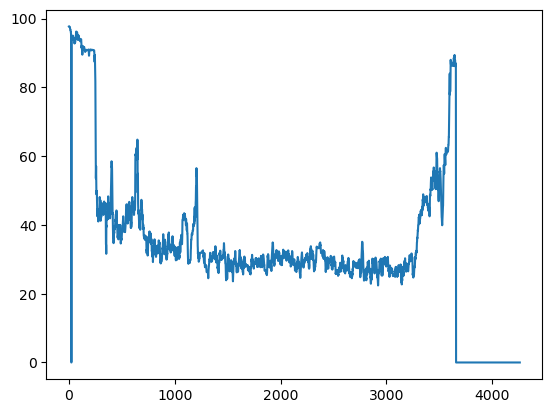

In [448]:
bis= Case.loc[Case['Filename'] == 'patient_420_BIS/BIS.csv', 'Column1']
biss = read_data(bis)
bi=biss['BIS/BIS']
plt.plot(bi)

319, 320, 326, 328, 329, 337, 339, 341, 344, 346, 352, 356, 357, 361, 371(137,8658), 372, 373, 374, 376, 379, 380, 386,392, 395, 401, 403, 404, 412, 420

In [449]:
eega = Case.loc[Case['Filename'] == 'patient_420_BIS/EEG1_WAV.csv', 'Column1']
eegb = Case.loc[Case['Filename'] == 'patient_420_BIS/EEG2_WAV.csv', 'Column1']


eg1 = read_data(eega)
eg2 = read_data(eegb)


In [450]:
E=eg2['BIS/EEG2_WAV']

In [451]:
#checking for missing values

def missing_values(eeg_signal):

    # Check for missing values
    missing_values = np.isnan(eeg_signal)
    length_signals = len(eeg_signal)

    # Count the number of missing values
    num_missing_values = np.sum(missing_values)
    percentage_missing_values = (num_missing_values/length_signals)*100

    # Print the indices and values of missing values
    missing_indices = np.where(missing_values)[0]
    missing_values_list = eeg_signal[missing_indices]

    print("Missing Values:")
    print(f"Total Missing Values: {num_missing_values}")
    print(f"Percentage of Missing Values: {percentage_missing_values} %")  
missing_values(E)

Missing Values:
Total Missing Values: 136
Percentage of Missing Values: 0.024926320728435064 %


In [452]:
def handle_missing_values(signal):
    # Interpolate missing values using linear interpolation
    mask = np.isnan(signal)
    signal[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), signal[~mask])
    return signal
handle_missing_values(E)

0         22.75
1         36.20
2         34.75
3         22.80
4         24.95
          ...  
545603    24.50
545604    24.50
545605    24.50
545606    24.50
545607    24.50
Name: BIS/EEG2_WAV, Length: 545608, dtype: float64

In [463]:
bi[3655:]

3655    86.4
3656    86.3
3657     0.0
3658     0.0
3659     0.0
        ... 
4256     0.0
4257     0.0
4258     0.0
4259     0.0
4260     0.0
Name: BIS/BIS, Length: 606, dtype: float64

In [464]:
### import numpy as np

# Assuming BIS and EEG are numpy arrays
BIS = bi
EEG = eg2

# Define the sampling frequency
fs = 128

# Define the indices for BIS range from 200 to 800
bis_start_index = 0
bis_end_index = 3656
# Convert the BIS indices to EEG indices

eeg_start_index = bis_start_index * fs
eeg_end_index = bis_end_index * fs

# Select EEG values for BIS[60:2355]
selected_EEG = EEG[eeg_start_index:eeg_end_index]
selected_bis = BIS[bis_start_index:bis_end_index]
selected_bis = np.array(selected_bis)


Number of BIS before windowing: 3656


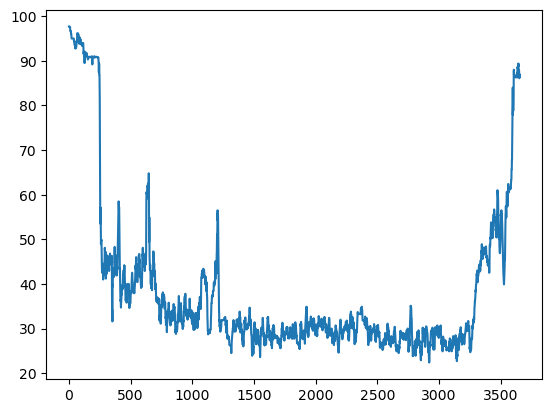

In [465]:
# Replacing the zero values in BIS
from scipy.interpolate import interp1d

def replace_zeroes_with_interpolation(series):
    # Find indices and values of non-zero elements
    non_zero_indices = [i for i, val in enumerate(series) if val != 0]
    non_zero_values = [series[i] for i in non_zero_indices]

    # Create an interpolation function using scipy's interp1d
    interpolation_function = interp1d(non_zero_indices, non_zero_values, kind='linear', bounds_error=False, fill_value="extrapolate")

    # Replace zeroes with interpolated values
    new_series = [interpolation_function(i) if val == 0 else val for i, val in enumerate(series)]

    return new_series

# Test the function
series = selected_bis
new_bis = replace_zeroes_with_interpolation(series)
plt.plot(new_bis)
print("Number of BIS before windowing:", len(new_bis))

1(), 69(), 100(0 to 3530), 71(0,6020), 88(20, 7515), 78(30,3550), 80(60, 2355), 92(20,4150), 112(100, 10185), 141(190, 4170), 129(0, 7080), 114 (125, 16200), 109(0, 13950), 97(55, 14860), 68(150, 8035), 66(150, 8650), 8(50, 5310), 9(140, 3850), 30(80, 10520), 31(130, 9870), 35(160, 5105), 36(115, 4595), 40(180, 6050), 47(75, 6515), 61(95, 8685), 203(80, 6125), 208(185, 8110), 212(25, 2925),

not to use 120, 150, 200

220(200, 8990), 213(155, 4530), 227(125, 4860), 231(125, 6365), 240(80, 5845), 253(20, 4220), 267(25,4345),268(35, 5130)